In [1]:
# Sagar Sahu
# IBM Quantum Challenge 2024- Lab 0

# Installing Qiskit
!pip install 'qiskit[visualization]'==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=aa197317bcd3b8a810d87ed6cba9726823d9a0f24ec9fe9e4690cd668d6f99f5
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


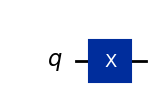

In [2]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [3]:
### Install the other required packages as well

!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: fil

In [4]:
### Imports

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

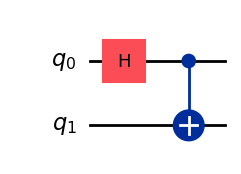

In [5]:
# Create a 2-qubit entangled Bell state
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [6]:
# Applying an I gate to a qubit is the same as doing nothing to a qubit.
# We only have two operators which measure both qubits: XX and ZZ.

# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [7]:
# Running circuit using Qiskit Runtime

# Set up the Estimator ('backend' is deprecated and now replaced with 'mode')
estimator = Estimator(mode=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

base_primitive._run:INFO:2024-07-06 17:51:37,744: Submitting job using options {'options': {}, 'version': 2, 'support_qiskit': True}


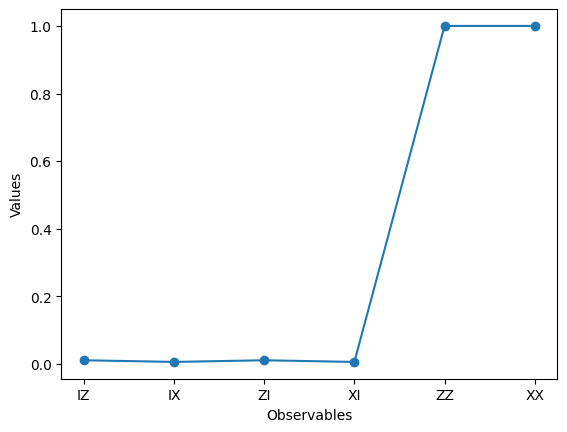

In [8]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()